In [1]:
import sys
sys.path.append('../../')

import numpy as np

from src.mechanism.double_auction import DoubleAuction
from src.game import Game
from src.strategy import Strategy

from src.learner.frank_wolfe import FrankWolfe
from src.learner.poga import POGA
from src.learner.soda import SODA

**Setting**
create specific Single Item Auction setting

In [2]:
# parameter mechanism
bidder = ['S', 'B']
o_space = {'S':[0.0, 1.0], 'B':[0.0, 1.0]}
a_space = {'S':[0.0, 1.0], 'B':[0.0, 1.0]}

param_prior = {
    'distribution':'uniform'
    }
param_util = {
    'payment_rule': 'average'
    }

# parameter approximation game
n = 64
m = 64

# create mechanism
mechanism = DoubleAuction(bidder, o_space, a_space, param_prior, param_util)

# create approximation game
game = Game(mechanism, n, m)
game.get_utility(mechanism)

**Learner**
Specify Learning Algorithm

In [3]:
# parameter learner
max_iter = int(1e4)
tol = 1e-4
stop_criterion = 'util_loss'
steprule_bool = True
eta = 0.05
beta = 1/20

#learner = SODA(max_iter, tol, stop_criterion, steprule_bool, eta, beta)
#learner = FrankWolfe(max_iter, tol, stop_criterion)
learner = POGA(max_iter, tol, stop_criterion, steprule_bool, eta, beta)

In [4]:
#create and initialize strategies
strategies = {}
for i in game.set_bidder:
    strategies[i] = Strategy(i, game)
    strategies[i].initialize('random')
    
# run soda
strategies = learner.run(mechanism, game, strategies, disable_tqdm=False, print=True)

 28%|█████▌              | 2.78k/10.0k [00:11<00:29, 247it/s]

Convergence after 2777 iterations
Value of stopping criterion (util_loss) 0.0001


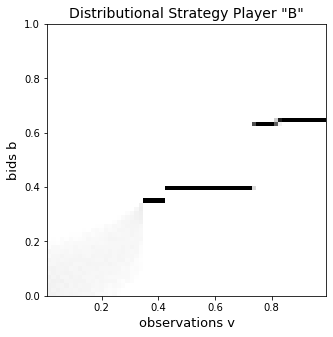

In [5]:
strategies['B'].plot()

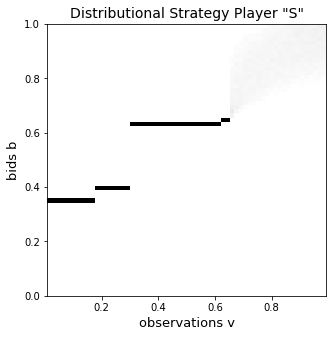

In [6]:
strategies['S'].plot()
